In [5]:
# load data
import pandas
import numpy as np
data = pandas.read_csv('original_data.csv')

In [23]:
crash_ids = data['Crash ID'].unique()
print(len(crash_ids))

vehicles = data[data['Vehicle ID'].notnull()]
for id in crash_ids:
    exists = vehicles[data['Crash ID'] == id]
    if len(exists) == 0:
        print(f'Crash ID {id} does not have any vehicles associated with it')
        
participants = data[data['Participant ID'].notnull()]
for id in crash_ids:
    exists = participants[data['Crash ID'] == id]
    if len(exists) == 0:
        print(f'Crash ID {id} does not have any participants associated with it')

508


C:\Users\jared\AppData\Local\Temp/ipykernel_23960/1428650973.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exists = vehicles[data['Crash ID'] == id]
C:\Users\jared\AppData\Local\Temp/ipykernel_23960/1428650973.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exists = participants[data['Crash ID'] == id]


In [7]:
lon = data[data['Longitude Degrees'].gt(180) | data['Longitude Degrees'].lt(-180)].filter(items=['Longitude Degrees'])
print(lon.head())

lat = data[data['Latitude Degrees'].gt(90) | data['Latitude Degrees'].lt(-90)].filter(items=['Latitude Degrees'])
print(lat.head())

Empty DataFrame
Columns: [Longitude Degrees]
Index: []
Empty DataFrame
Columns: [Latitude Degrees]
Index: []


In [8]:
if len(participants) > len(vehicles):
    print('There are more participants than vehicles')


<AxesSubplot:xlabel='Crash Month'>

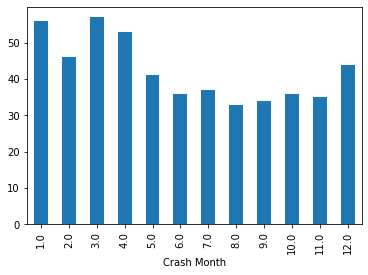

In [24]:
data.groupby(['Crash Month']).count()['Crash ID'].plot.bar()

In [34]:
crashes = data[data['Record Type'] == 1].dropna(axis=1, how='all')
vehicles = data[data['Record Type'] == 2].dropna(axis=1, how='all')
participants = data[data['Record Type'] == 3].dropna(axis=1, how='all')


In [35]:
crashes.head()

,Crash ID,Record Type,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,...,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count
0,1809119,1,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0
5,1809229,1,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
9,1809637,1,1811.0,5.0,17.0,2019.0,6.0,99.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
12,1810874,1,99981.0,4.0,7.0,2019.0,1.0,0.0,26.0,245.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
16,1812266,1,5970.0,7.0,8.0,2019.0,2.0,14.0,26.0,245.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5.0,2.0,0.0,3.0


In [37]:
vehicles.head()

,Crash ID,Record Type,Vehicle ID,Vehicle Coded Seq#,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,...,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity
1,1809119,2,3409578.0,1.0,1.0,0.0,9.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1809119,2,3409579.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0,0.0
6,1809229,2,3409765.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
10,1809637,2,3410470.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,62.0,10.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13,1810874,2,3412622.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [38]:
participants.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,...,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,1.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,9.0,9.0,0.0
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,3.0,0.0,0.0,...,NaN,NaN,18.0,NaN,NaN,NaN,0.0,9.0,1.0,0.0
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,1.0,0.0,0.0,...,81.0,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0


In [40]:
crashes.to_csv('crashes.csv')
vehicles.to_csv('vehicles.csv')
participants.to_csv('participants.csv')
